<a href="https://colab.research.google.com/github/ShineySun/BASIC_AI/blob/master/Simple%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 국민대학교 소프트웨어 학부
## 20143038 김선필
### 차량지능기초 과제 2
### VER 1. TORCH



###### 20143038 김선필
### Dataset Infomation
###### ■ Breast Cancer Wisconsin Dataset (유방암 진단 데이터)
###### ● Number of Instances : 569
###### ● Number of Attributes : numeric, predictive attributes and the class
###### ● Attribute Information
###### - radius (mean of distances from center to points on the perimeter)
###### - texture (standard deviation of gray-scale values)
###### - perimeter
###### - area
###### - smoothness (local variation in radius lengths)
###### - compactness (perimeter^2 / area - 1.0)
###### - concavity (severity of concave portions of the contour)
###### - concave points (number of concave portions of the contour)
###### - symmetry
###### - fractal dimension (“coastline approximation” - 1)
###### - Class 
###### ○ WDBC-Malignant(악성) : 212
###### ○ WDBC-Benign(양성)    : 357

In [0]:
# Data loading
# 20143038 김선필
'''
sklearn.datasets 패키지는 mnist, iris 데이터같은 대표적인 sample dataset을 제공하고 손쉽게 다운로드 및 로딩할 수 있는 패키지이다.
sample로 제공해주는 dataset이기에 그 샘플 데이터의 크기가 머신러닝을 학습하기에 충분하지 않을수 있다.
sample dataset은 sklearn을 활용함에 있어서 샘플로써 활용하기에 용이하도록 제공하고 있으며, 
실제 데이터셋은 보통사이즈가 제공해주는 것보다 훨씬 크다.

sklearn의 공식 document에서도 이렇게 제공해주는 sample datasets을 Toy datasets라고 칭한다.
'''
from sklearn.datasets import load_breast_cancer

# Breast Cancer Wisconsin Dataset 을 cancer 변수에 할당한다.
cancer = load_breast_cancer()
# Breast Cancer Wisconsin Dataset 의 data 부분을 data 변수에 할당한다.
# data shape : ( 569, 30 )         data type : numpy.ndarray
data = cancer.data
#print(data.shape)
#print(type(data))
# Breast Cancer Wisconsin Dataset 의 label 부분(양성, 악성)을 label 변수에 할당한다.
# label shape : ( 569, 30 )        label type : numpy.ndarray
labels = cancer.target
#print(labels.shape)
#print(type(labels))

#print(cancer)
print(data)
print(labels)
print(data.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

###### 20143038 김선필
#### Pandas를 이용한 데이터 시각화
##### 위의 코드대로 데이터를 보면 데이터가 어떻게 구성되어 있는지 잘 알수가 없기 때문에, pandas를 이용하여 보기 쉽게 확인한다.

In [0]:
# 20143038 김선필
# Dataframe을 다루기 위해 만들어진 Pandas 라이브러리를 import한다.
import pandas as pd

# Pandas Dataframe을 생성한다.
# 각 Data마다의 feature name 을 columns 값으로 넘겨주고, data를 넘겨준다.
df = pd.DataFrame(data, columns=cancer.feature_names)
# Series 객체
# 1차원 배열과 같은 자료구조로 index가 같이 출력되는 특징이 있다.
# DataFrame의 한 개의 column에 해당하는 데이터의 모음 object 즉, column vector를 표현한다.
sy = pd.Series(labels, dtype="category")
# 카테고리의 이름을 재설정한다. labels 의 값을 target_names 에 할당된 값 maliganant, benign 으로 재설정한다.
sy = sy.cat.rename_categories(cancer.target_names)
# class 라는 이름의 column vector를 추가한다.
df['class'] = sy
# DataFrame의 앞 5개의 data를 시각화한다.
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


###### 20143038 김선필
###### Dataset에서 Training Set과 Test Set으로 나눈다.
###### 대게 Training Set 과 Test Set의 비율은 9 : 1 로 설정한다.
#### - train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
###### -- Parameter

1.   arrays : 분할시킬 데이터를 입력
2.   test_size : 테스트 데이터셋의 비율
3.   train_size : 학습 데이터셋의 비율
4.   random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값
5.   shuffle : 셔플여부설정

###### -- Return
1.   x_train,x_test,y_train,y_test : arrays에 데이터와 레이블을 둘다 넣었을경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.



In [0]:
# Split data
# 20143038 김선필
from sklearn.model_selection import train_test_split

# 데이터와 레이블 정보를 넣어 training set과 test set을 분할한다. 
# train set과 test set의 비율은 9 : 1로 설정한다.
# x_train 의 경우 train set의 Data 정보이며,
# y_train 의 경우 train set의 Label 정보로 구성되어 있다.
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1) 
print(len(x_train), len(x_test), type(x_train))

print(x_test)
print(y_test)

512 57 <class 'numpy.ndarray'>
[[1.382e+01 2.449e+01 9.233e+01 ... 1.521e-01 3.651e-01 1.183e-01]
 [2.137e+01 1.510e+01 1.413e+02 ... 1.966e-01 2.730e-01 8.666e-02]
 [1.017e+01 1.488e+01 6.455e+01 ... 2.579e-02 3.557e-01 8.020e-02]
 ...
 [1.348e+01 2.082e+01 8.840e+01 ... 2.258e-01 2.807e-01 1.071e-01]
 [1.026e+01 1.471e+01 6.620e+01 ... 4.074e-02 2.434e-01 8.488e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]]
[0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0]


###### 20143038 김선필
##### Numpy 는 GPU를 사용하여 수치 연산을 가속화 할 수 없다. 현대 심층 신경망에서 GPU는 종종 50배 또는 그 이상의 속도 향상을 제공하기 때문에 Numpy는 현대의 딥러닝에는 충분하지 않다.
##### Pytorch의 Tensor 자료형은 기본적으로 Numpy 배열과 동일하다. Tensor는 N차원 배열이며, Pytorch는 Tensor 연산을 위한 다양한 함수를 제공한다. 또한 GPU를 활용하여 수치 연산을 가속화할 수 있으며, 이는 단지 새로운 자료형으로 변환해주기만 하면 된다.

##### ● 배열과 리스트를 텐서 자료형으로 변환
###### 리스트를 텐서 자료형으로 바꾸려면 torch.tensor() 또는 torch.as_tensor(), torch.from_numpy() 메소드를 사용한다.


1.   torch.tensor() : 값 복사를 사용하여 새로운 텐서 자료형 인스턴스를 생성
2.   torch.as_tensor() : 리스트나 ndarray 객체를 받는다. 값 참조를 사용하여 텐서 자료형 뷰를 만든다.
3. torch.from_numpy() : ndarray 객체를 받는다. 값 참조를 사용하여 텐서 자료형 뷰를 만든다.

##### ● Variable
###### autograd.Variables 클래스는 Tensor를 감싸고 있으며, Tensor 기반으로 정의된 거의 대부분의 연산을 지원한다. 계산이 완료된 후 .backward() 를 호출하여 모든 gradient을 자동으로 계산할 수 있다.

###### ※ 구버전의 경우 Variable 은 gradient를 가지고 있고, Tensor의 경우 없었지만, 최신 버전으로 바뀌어 가면서, Variable은 더이상 사용되지 않으며, Tensor도 gradient를 가지게 되며, Tensor 클래스를 사용한다.


In [0]:
# Convert to tensor
# 20143038 김선필
# 텐서를 생성하는 라이브러리
import torch
# 신경망을 생성하는 라이브러리
import torch.nn as nn
import torch.nn.functional as F
# 데이터 조작 등 유틸리티 기능 제공
from torch.utils.data import DataLoader, TensorDataset
# 자동 미분 기능을 제공하는 라이브러리
from torch.autograd import Variable

# x_train 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
x_train = Variable(torch.from_numpy(x_train).float())
# y_train 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
y_train = Variable(torch.from_numpy(y_train).float())

# x_test 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
x_test = Variable(torch.from_numpy(x_test).float())
# y_test 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
y_test = Variable(torch.from_numpy(y_test).float())

print(type(x_train))

<class 'torch.Tensor'>


###### 20143038 김선필
##### TensorDataset : Dataset을 상속한 클래스로 학습 데이터 X와 레이블 Y를 묶어 놓은 컨테이너 이다.
##### TensorDataset을 DataLoader에 전달하면 for loop에서 데이터의 일부만 간단하게 추출할 수 있다.

In [0]:
# Generating dataset
# 20143038 김선필
# training set 의 학습 데이터와 레이블을 TensorDataset 컨테이너에 할당한다.
train_set = TensorDataset(x_train, y_train)
# test set 의 학습 데이터와 레이블을 TensorDataset 컨테이너에 할당한다.
test_set = TensorDataset(x_test, y_test)

# 데이터 순서를 섞어서 8개씩 데이터를 반환하는 DataLoader
train_loader = DataLoader(train_set, batch_size = 16, shuffle=True)

###### 20143038 김선필
#### 신경망은 torch.nn 패키지를 사용하여 생성할 수 있다.
##### nn.Module 은 layer와 output을 반환하는 forward 메소드를 포함하고 있다.
##### ■ 신경망의 일반적인 학습 과정


1.   학습 가능한 매개변수를 갖는 신경망을 정의한다.
2.   데이터셋 입력을 반복한다.
3.   입력을 신경망에서 전파한다. (forward)
4.   Loss를 계산한다.
5.   Gradient를 신경망의 매개변수들에 역으로 전파한다. (backward)
6.   신경망의 가중치를 갱신한다.

##### ■ nn.Linear : 선형 모델 -> y = Wx + b

##### * Layer : Model or Module을 구성하는 한 개의 층, Convolutional Layer, Linear Layer 등이 존재.
##### * Module : 1개 이상의 Layer가 모여서 구성된 것. Module이 모여 새로운 Module을 만들 수도 있다.
##### * Model : 사용자가 정의하는 모델 혹시 이미 구현된 모델, 즉 전체 네트워크를 의미한다.



In [0]:
# 20143038 김선필

# Construct model
# 모델 생성
# Pytorch Model 사용 조건
# 1. torch.nn.Module을 상속해야한다.
# 2. __init__()과 forward() 를 override 해야한다.
# ---- 사용자 정의 모델의 경우 init 과 forward의 인자는 자유롭게 바꿀 수 있다.
# ---- 이름이 x일 필요도 없으며, 인자의 개수 또한 달라질 수 있다.

class Model(nn.Module):
  # __init__() 에서는 모델에서 사용될 module을 정의한다. module만 정의할 수도, 
  # activation function 등을 전부 정의할 수도 있다.
  # module은 nn,Linear, nn.Conv2d 등을 포함한다.
  # activation function은 nn.funtional.relu, nn.function.sigmoid 등을 포함한다.
  def __init__(self):
    super().__init__()
    
    # torch.nn.Linear 는 레이어 간의 선형결합을 의미하고, 이를 활성함수에 통과시키면, MLP 구조가 된다.
    # torch.nn.Linear(in_features, out_features,bias=True)
    # in_features : size of each input sample
    # out_features : size of each output sample
    # bias : If set to False, the layer will not learn an additive bias

    self.layer1 = nn.Linear(30, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 32)
    self.layer4 = nn.Linear(32, 16)
    self.layer5 = nn.Linear(16, 1)

    # torch.nn.ReLU(inplace=False) : element 별로 rectified linear unit function을 적용한다.
    self.act = nn.ReLU()
   
  # forward() 에서는 모델에서 행해져야 하는 계산을 정의한다. 모델에서 forward 계산과
  # backward gradient 계산이 있는데, 그 중 forward 부분을 정의한다. 
  # input을 네트워크에 통과시켜 어떤 output이 나오는지 정의한다고 보면된다.
  # __init__() 에서 정의한 module들을 그대로 갖다 쓴다.
  # backward 계산은 Pytorch에서 알아서 계산이 된다. 
  def forward(self,x):
    # ReLU(Linear(30,128))
    x = self.act(self.layer1(x))
    # ReLU(Linear(128,64))
    x = self.act(self.layer2(x))
    # ReLU(Linear(64,32))
    x = self.act(self.layer3(x))
    # ReLU(Linear(32,16))
    x = self.act(self.layer4(x))
    # ReLU(Linear(16,1))
    x = self.layer5(x)
    # torch.nn.Sigmoid : element 별로 sigmoid function을 적용한다.
    x = torch.sigmoid(x)
    
    return x

# model 초기화
model = Model()
print(model)


Model(
  (layer1): Linear(in_features=30, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=16, bias=True)
  (layer5): Linear(in_features=16, out_features=1, bias=True)
  (act): ReLU()
)


In [0]:
# # Construct model
# 20143038 김선필
# class Model(nn.Module):
#   def __init__(self):
#     super().__init__()
    
#     self.layer1 = nn.Linear(30, 128)
#     self.bn1 = nn.BatchNorm1d(128)
#     self.layer2 = nn.Linear(128, 64)
#     self.bn2 = nn.BatchNorm1d(64)
#     self.layer3 = nn.Linear(64, 32)
#     self.bn3 = nn.BatchNorm1d(32)
#     self.layer4 = nn.Linear(32, 16)
#     self.bn4 = nn.BatchNorm1d(16)
#     self.layer5 = nn.Linear(16, 1)
#     self.act = nn.ReLU()
#     #self.act = nn.LogSigmoid()

#   def forward(self,x):
#     x = self.act(self.bn1(self.layer1(x)))
#     x = self.act(self.bn2(self.layer2(x)))
#     x = self.act(self.bn3(self.layer3(x)))
#     x = self.act(self.bn4(self.layer4(x)))
#     x = self.layer5(x)
#     x = torch.sigmoid(x)
    
#     return x

# model = Model()
# print(model)



In [0]:
# Configure optimizer
# 20143038 김선필
# 옵티마이저 초기화
# torch.optim.SGD(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False)
# stochastic gradient descent를 적용한다.
# params : iterable of parameters to optimizer or dicts defining parameter groups
# lr : learning rate
# momentum : momentum factor
# weight_decay : weight decay
# dampening : dampening for momentum
# nesterov : enables Nesterov momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [0]:
# Training

# 20143038 김선필

# 수행할 epoch 정의
epochs = 200
# loss 정보를 저장할 list 초기화
losses = list()
# 정확도 정보를 저장할 list 초기화
accuracies = list()


for epoch in range(epochs):
  # epoch 별 loss 초기화
  epoch_loss = 0  
  # epoch 별 accuracy 초기화
  epoch_accuracy = 0

  for x, y in train_loader:
    # 역전파 단계 전에, Optimizer 객체를 사용하여, 갱신할 변수들에 대한
    # 모든 변화도를 0으로 만든다. 이렇게 하는 이유는 기본적으로 backward()
    # 를 호출할 때마다 변화도가 버퍼에 누적되기 때문이다.
    optimizer.zero_grad()
    
    # 순전파 단계 : 모델에 x 를 전달하여 foward() function을 통과한 output을 반환받는다.
    output = model(x)
      
    # torch.nn.functional.binary_cross_entropy(input, target, weight=None, size_average=None, reduce=None, reduction='mean')
    # target 과 output 사이의 Binary Cross Entropy 값을 구한다.
    # input : Tensor of arbitrary shape
    # target : Tensor of the same shape as input
    loss = F.binary_cross_entropy(output, y)

    # autograd를 사용하여 역전파 단계를 계산한다. 이는 required_grad=True를 갖는
    # 모든 Tensor에 대해 손실의 변화도를 계산한다.
    loss.backward()
    
    # optimizer.step() function을 호출하면 매개변수가 갱신이 된다.
    optimizer.step()
    
    # 이진 분류이기 때문에
    # output의 값이 0.5 보다 클 때 라벨값 1로 지정
    output[output>=0.5] = 1
    # output의 값이 0.5보다 작을 때 라벨값 0로 지정
    output[output<0.5] = 0
    # output 결과와 ground truth 결과에 대한 accuracy 계산
    accuracy = sum(sum(y.data.numpy() == output.data.T.numpy()))
    
    # 한 epoch에서 loss의 누적합을 계산
    epoch_loss += loss.item()
    # 한 epoch에서 accuracy의 누적합을 계산
    epoch_accuracy += accuracy
  
  # loss의 누적 합을 데이터셋의 개수로 나눔으로써 평균낸다.
  epoch_loss /= len(train_loader)
  # accuracy의 누적 합을 데이터셋의 개수로 나눔으로써 평균낸다.
  epoch_accuracy /= len(x_train)
  # 평균 loss, accuracy 출력
  print(str(epoch+1).zfill(3), "loss :", round(epoch_loss,4),"accuracy :", round(epoch_accuracy,4))
  
  # epoch 별 평균 loss 를 저장할 list
  losses.append(epoch_loss)
  # epoch 별 평균 accuracy 를 저장할 list
  accuracies.append(epoch_accuracy)

  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])) is deprecated. Please ensure they have the same size.


001 loss : 0.7364 accuracy : 0.5332
002 loss : 0.617 accuracy : 0.6523
003 loss : 0.567 accuracy : 0.7383
004 loss : 0.537 accuracy : 0.7637
005 loss : 0.4829 accuracy : 0.8086
006 loss : 0.4456 accuracy : 0.8574
007 loss : 0.4357 accuracy : 0.8418
008 loss : 0.3909 accuracy : 0.8594
009 loss : 0.414 accuracy : 0.8516
010 loss : 0.4348 accuracy : 0.832
011 loss : 0.4149 accuracy : 0.8359
012 loss : 0.3338 accuracy : 0.8887
013 loss : 0.3984 accuracy : 0.8281
014 loss : 0.3558 accuracy : 0.8652
015 loss : 0.3411 accuracy : 0.873
016 loss : 0.3379 accuracy : 0.8691
017 loss : 0.3251 accuracy : 0.8594
018 loss : 0.3555 accuracy : 0.8613
019 loss : 0.3018 accuracy : 0.8867
020 loss : 0.2746 accuracy : 0.9062
021 loss : 0.2615 accuracy : 0.9043
022 loss : 0.3231 accuracy : 0.873
023 loss : 0.2849 accuracy : 0.8867
024 loss : 0.2983 accuracy : 0.8867
025 loss : 0.2541 accuracy : 0.9043
026 loss : 0.2796 accuracy : 0.8926
027 loss : 0.2482 accuracy : 0.9043
028 loss : 0.2849 accuracy : 0.8965

### Loss & Accuracy Plotting
###### 20143038 김선필
#### Matplotlib 는 Python에서 데이터를 차트나 플롯으로 그려주는 라이브러리 패키지로서 가장 많이 사용되는 데이터 시각화 패키지로 알려져있다.
##### Matplotlib 는 라인 플롯, 바 차트, 히스토그램, 파이차트 등을 비롯하여 다양한 차트와 플롯 스타일을 지원한다.

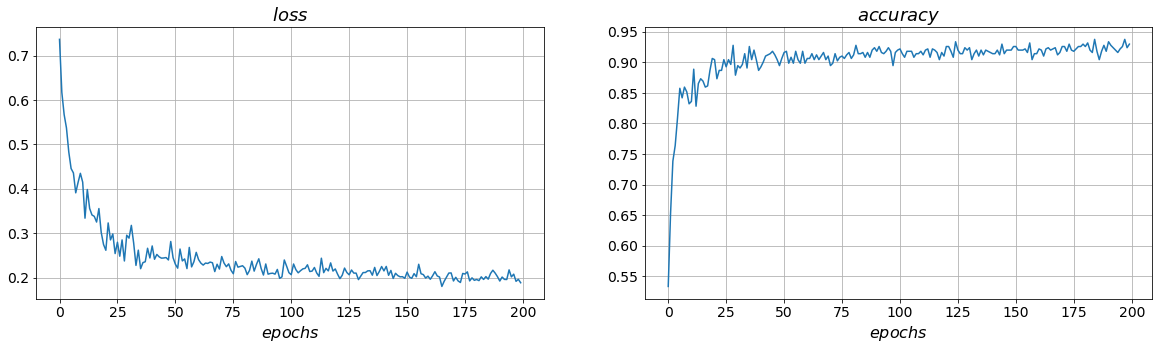

In [0]:
# 20143038 김선필

# Plot result

# matplotlib를 사용하기 위해서는 먼저 matplotlib.pyplot을 아래와 같이 import한다. 
# pyplot을 다른 이름으로 사용할 수 있지만 통산 plt라는 alias를 사용한다.
import matplotlib.pyplot as plt

# (20x5) 사이즈의 새로운 figure를 생성한다.
plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

# 전체 figure을 가로 2칸, 세로 1칸으로 쪼개고 그 중 첫번째 칸에 plot 한다.
plt.subplot(1,2,1)
# 제목의 이름은 'loss' 으로 지정한다.
plt.title("$loss$",fontsize = 18)
# losses list에 들어있는값을 plot한다.
plt.plot(losses)
plt.grid()
# plt.xlabel() 은 x 축의 이름을 epoch라는 이름으로 정해준다
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# 전체 figure을 가로 2칸, 세로 1칸으로 쪼개고 그 중 두번째 칸에 plot 한다.
plt.subplot(1,2,2)
# 제목의 이름은 'accuracy' 으로 지정한다.
plt.title("$accuracy$", fontsize = 18)
# accuracies list에 들어있는값을 plot한다.
plt.plot(accuracies)

plt.grid()
# plt.xlabel() 은 x 축의 이름을 epoch라는 이름으로 정해준다
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

###### 20143038
### Test Section
##### Test 과정에서는 test 데이터셋을 학습된 모델에 적용한다.
##### 학습된 모델에서 나온 output을 ground truth value와 비교하여 성능을 구한다.

In [0]:
# Test Section
# 20143038 김선필
# test 데이터를 학습된 모델에 적용한다.
output = model(x_test)
# output의 값이 0.5 보다 클 때 라벨값 1로 지정
output[output>=0.5] = 1
# output의 값이 0.5 보다 작을 때 라벨값 0로 지정
output[output<0.5] = 0

# output 결과와 ground truth 결과에 대한 test accuracy 계산
accuracy = sum(sum(y_test.data.numpy() == output.data.T.numpy())) /len(y_test)
acc_ver1 = round(accuracy,4)
print("test_set accuracy :", round(accuracy,4))

test_set accuracy : 0.8947


## 국민대학교 소프트웨어 학부
## 20143038 김선필
### 차량지능기초 과제 2
### VER 2. Tensor_flow



###### 20143038 김선필
### Dataset Infomation
###### ■ Breast Cancer Wisconsin Dataset (유방암 진단 데이터)
###### ● Number of Instances : 569
###### ● Number of Attributes : numeric, predictive attributes and the class
###### ● Attribute Information
###### - radius (mean of distances from center to points on the perimeter)
###### - texture (standard deviation of gray-scale values)
###### - perimeter
###### - area
###### - smoothness (local variation in radius lengths)
###### - compactness (perimeter^2 / area - 1.0)
###### - concavity (severity of concave portions of the contour)
###### - concave points (number of concave portions of the contour)
###### - symmetry
###### - fractal dimension (“coastline approximation” - 1)
###### - Class 
###### ○ WDBC-Malignant(악성) : 212
###### ○ WDBC-Benign(양성)    : 357

In [0]:
# Data loading
# 20143038 김선필
'''
sklearn.datasets 패키지는 mnist, iris 데이터같은 대표적인 sample dataset을 제공하고 손쉽게 다운로드 및 로딩할 수 있는 패키지이다.
sample로 제공해주는 dataset이기에 그 샘플 데이터의 크기가 머신러닝을 학습하기에 충분하지 않을수 있다.
sample dataset은 sklearn을 활용함에 있어서 샘플로써 활용하기에 용이하도록 제공하고 있으며, 
실제 데이터셋은 보통사이즈가 제공해주는 것보다 훨씬 크다.

sklearn의 공식 document에서도 이렇게 제공해주는 sample datasets을 Toy datasets라고 칭한다.
'''
from sklearn.datasets import load_breast_cancer

# Breast Cancer Wisconsin Dataset 을 cancer 변수에 할당한다.
cancer = load_breast_cancer()
# Breast Cancer Wisconsin Dataset 의 data 부분을 data 변수에 할당한다.
# data shape : ( 569, 30 )         data type : numpy.ndarray
data = cancer.data
#print(data.shape)
#print(type(data))
# Breast Cancer Wisconsin Dataset 의 label 부분(양성, 악성)을 label 변수에 할당한다.
# label shape : ( 569, 30 )        label type : numpy.ndarray
labels = cancer.target
#print(labels.shape)
#print(type(labels))

#print(cancer)
print(data)
print(labels)
print(data.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

###### 20143038 김선필
#### Pandas를 이용한 데이터 시각화
##### 위의 코드대로 데이터를 보면 데이터가 어떻게 구성되어 있는지 잘 알수가 없기 때문에, pandas를 이용하여 보기 쉽게 확인한다.

In [0]:
# 20143038 김선필
# Dataframe을 다루기 위해 만들어진 Pandas 라이브러리를 import한다.
import pandas as pd

# Pandas Dataframe을 생성한다.
# 각 Data마다의 feature name 을 columns 값으로 넘겨주고, data를 넘겨준다.
df = pd.DataFrame(data, columns=cancer.feature_names)
# Series 객체
# 1차원 배열과 같은 자료구조로 index가 같이 출력되는 특징이 있다.
# DataFrame의 한 개의 column에 해당하는 데이터의 모음 object 즉, column vector를 표현한다.
sy = pd.Series(labels, dtype="category")
# 카테고리의 이름을 재설정한다. labels 의 값을 target_names 에 할당된 값 maliganant, benign 으로 재설정한다.
sy = sy.cat.rename_categories(cancer.target_names)
# class 라는 이름의 column vector를 추가한다.
df['class'] = sy
# DataFrame의 앞 5개의 data를 시각화한다.
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


###### 20143038 김선필
###### Dataset에서 Training Set과 Test Set으로 나눈다.
###### 대게 Training Set 과 Test Set의 비율은 9 : 1 로 설정한다.
#### - train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
###### -- Parameter

1.   arrays : 분할시킬 데이터를 입력
2.   test_size : 테스트 데이터셋의 비율
3.   train_size : 학습 데이터셋의 비율
4.   random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값
5.   shuffle : 셔플여부설정

###### -- Return
1.   X_train,X_test,Y_train,Y_test : arrays에 데이터와 레이블을 둘다 넣었을경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.



In [0]:
# Split data
# 20143038 김선필
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# 데이터와 레이블 정보를 넣어 training set과 test set을 분할한다. 
# train set과 test set의 비율은 9 : 1로 설정한다.
# X_train 의 경우 train set의 Data 정보이며,
# Y_train 의 경우 train set의 Label 정보로 구성되어 있다.
X_train,X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.1) 
print(len(X_train), len(X_test), type(X_train))

print(X_test)
print(Y_test)

Using TensorFlow backend.


512 57 <class 'numpy.ndarray'>
[[9.000e+00 1.440e+01 5.636e+01 ... 1.389e-02 2.991e-01 7.804e-02]
 [1.204e+01 2.814e+01 7.685e+01 ... 5.547e-02 2.404e-01 6.639e-02]
 [1.390e+01 1.662e+01 8.897e+01 ... 6.222e-02 2.679e-01 7.698e-02]
 ...
 [1.678e+01 1.880e+01 1.093e+02 ... 1.474e-01 2.810e-01 7.228e-02]
 [1.298e+01 1.935e+01 8.452e+01 ... 9.858e-02 3.596e-01 9.166e-02]
 [1.387e+01 2.070e+01 8.977e+01 ... 6.845e-02 2.249e-01 8.492e-02]]
[1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1]


###### 20143038 김선필
#### Tensorflow
##### tf.keras.layers.Flatten : 데이터에 있는 행을 펼쳐서 일렬로 늘려놓는 과정. 이층에서는 학습되고 가중치가 없고 데이터를 변환하기만 한다.
##### tf.keras.layers.Flatten(data_format=None, **kwargs)
##### tf.keras.layers.Dense : 이 층은 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부른다. 첫 번째 Dense 층은 128개의 노드(또는 뉴런)을 가진다.
##### tf.keras.layers.Dense(
#####    units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
#####    bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
#####    activity_regularizer=None, kernel_constraint=None, bias_constraint=None,
#####    **kwargs
) 

In [0]:
# Construct model

# 20143038 김선필
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

# Flatten 에 들어갈 input의 속성값 지정
n_input = 30

# hidden layer의 개수 정의
n_hidden_1 = 128
n_hidden_2 = 64
n_hidden_3 = 32
n_hidden_4 = 16

# output layer의 클래스 개수 정의
n_classes =1

# Sequential 은 레이어를 연결하여 구성된다.
# Flatten 은 입력을 1차원 벡터 형태로 변환한다.
# Dense 는 fully connected layer를 의미한다. activation function 으로는 relu 를 사용한다.
# 마지막 출력 레이어는 1개의 class 와 activation function으로는 sigmoid를 사용한다.
model=Sequential([
                  Flatten(input_shape=(n_input,)),
                  Dense(n_hidden_1,activation='relu'),
                  Dense(n_hidden_2,activation='relu'),
                  Dense(n_hidden_3,activation='relu'),
                  Dense(n_hidden_4,activation='relu'),
                  Dense(n_classes,activation='sigmoid'),                 
])

###### 20143038 김선필
###모델 컴파일
#####모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 컴파일 단계에서 추가됩니다:

##### * 손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
##### * 옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
##### * 지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [0]:
# Configure optimizer and loss function

# 20143038 김선필
# 옵티마이저 : Stochastic Gradient Descent
# LR : 0.001
# Loss : binary_crossentropy
# merics : 정확도 측정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

###### 20143038 김선필
### 모델 훈련
##### 신경망 모델을 훈련하는 단계는 다음과 같다.

##### 훈련 데이터를 모델에 넣는다.
##### 훈련을 시작하기 위해 model.fit 메서드를 호출하면 모델이 훈련 데이터를 학습합니다:
#### * tf.keras.Model.fit 에는 세 개의 중요한 매개변수가 존재한다.
1. epochs : 훈련은 epoch로 구성된다. 한 epoch는 전체 입력 데이터를 한번 순회하는 것을 의미하며, 작은 배치 단위로 나누어 수행이 된다.
2. batch_size : numpy 데이터를 전달하면 모델은 작은 배치로 나누고 훈련 과정에서 이 배치를 순회한다. 이 정수값은 배치의 크기를 지정한다. 전체 샘플 개수가 배치 크기로 나누어 떨어지지 않으면 마지막 배치의 크기는 더 작을 수 있다.
3. validation_data : 모델의 프로토타입을 만들 때는 검증 데이터(validation data)에서 간편하게 성능을 모니터링 합니다. 입력과 label의 튜플을 이 매개변수로 전달하면 epoch가 끝날 때마다 추론 모드(inference)에서 전달된 데이터의 손실과 측정 지표를 출력합니다.

In [0]:
#Training 

# 20143038 김선필
# epooch : 200
# shuffling : True - 각 epoch 마다 데이터셋을 섞는다.
# batch size : 8
# Train Dataset 을 사용
hist=model.fit(X_train,Y_train,epochs=200, batch_size=8, shuffle=True)

Epoch 1/200
64/64 [==============================] - 0s 2ms/step - loss: 4.6590 - accuracy: 0.3770
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.3770
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.4551
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.6406
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7695
Epoch 6/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7832
Epoch 7/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.8184
Epoch 8/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.8496
Epoch 9/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.8438
Epoch 10/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.8613
Epoch 11/

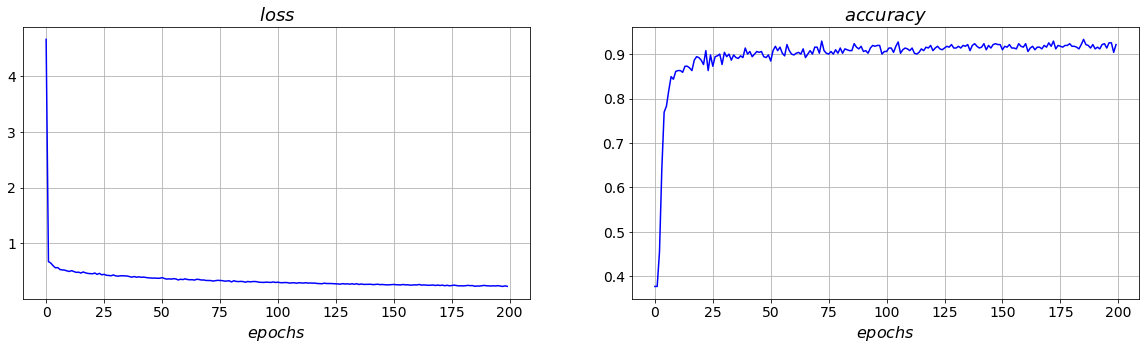

In [0]:
# 20143038 김선필

# Plot result

# matplotlib를 사용하기 위해서는 먼저 matplotlib.pyplot을 아래와 같이 import한다. 
# pyplot을 다른 이름으로 사용할 수 있지만 통산 plt라는 alias를 사용한다.

import matplotlib.pyplot as plt

# (20x5) 사이즈의 새로운 figure를 생성한다.
plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

# 전체 figure을 가로 2칸, 세로 1칸으로 쪼개고 그 중 첫번째 칸에 plot 한다.
plt.subplot(1,2,1)
# 제목의 이름은 'loss' 으로 지정한다.
plt.title("$loss$",fontsize = 18)
plt.plot(hist.history['loss'], 'b', label='train loss')
plt.grid()
# plt.xlabel() 은 x 축의 이름을 epoch라는 이름으로 정해준다
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# 전체 figure을 가로 2칸, 세로 1칸으로 쪼개고 그 중 두번째 칸에 plot 한다.
plt.subplot(1,2,2)
# 제목의 이름은 'accuracy' 으로 지정한다.
plt.title("$accuracy$", fontsize = 18)
plt.plot(hist.history['accuracy'], 'b', label='train accuracy')
plt.grid()
# plt.xlabel() 은 x 축의 이름을 epoch라는 이름으로 정해준다
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()


###### 20143038
### Test Section
##### Test 과정에서는 test 데이터셋을 학습된 모델에 적용한다.
##### 학습된 모델에서 나온 output을 ground truth value와 비교하여 성능을 구한다.

In [0]:
# 20143038 김선필

#Test

# Test Data를 이용하여 학습된 모델의 성능을 측정한다.
results=model.evaluate(X_test,Y_test, verbose=0)
print('test loss, test accuracy:', results)

test loss, test accuracy: [0.16365930438041687, 0.9473684430122375]


## 국민대학교 소프트웨어 학부
## 20143038 김선필
### 차량지능기초 과제 2
### VER 3. Torch - learning rate 조정을 통한 성능 개선
##### VER 1. VER 2. 경우에서 Loss 또느 Accuracy 가 일찍 수렴되는 경향을 보임으로써,
##### learning rate가 높게 잡힌건지에 대해 의문점이 들어 실험을 해보았다.
##### leaning rate 를 0.001 에서 0.0004으로 줄이고, 수렴값에 도달되지 않을수 있는 문제로 epoch 의 수를 200에서 300으로 늘렸다.


In [0]:
# Data loading
# 20143038 김선필
'''
sklearn.datasets 패키지는 mnist, iris 데이터같은 대표적인 sample dataset을 제공하고 손쉽게 다운로드 및 로딩할 수 있는 패키지이다.
sample로 제공해주는 dataset이기에 그 샘플 데이터의 크기가 머신러닝을 학습하기에 충분하지 않을수 있다.
sample dataset은 sklearn을 활용함에 있어서 샘플로써 활용하기에 용이하도록 제공하고 있으며, 
실제 데이터셋은 보통사이즈가 제공해주는 것보다 훨씬 크다.

sklearn의 공식 document에서도 이렇게 제공해주는 sample datasets을 Toy datasets라고 칭한다.
'''
from sklearn.datasets import load_breast_cancer
# Dataframe을 다루기 위해 만들어진 Pandas 라이브러리를 import한다.
import pandas as pd

# Breast Cancer Wisconsin Dataset 을 cancer 변수에 할당한다.
cancer = load_breast_cancer()
# Breast Cancer Wisconsin Dataset 의 data 부분을 data 변수에 할당한다.
# data shape : ( 569, 30 )         data type : numpy.ndarray
data = cancer.data
#print(data.shape)
#print(type(data))
# Breast Cancer Wisconsin Dataset 의 label 부분(양성, 악성)을 label 변수에 할당한다.
# label shape : ( 569, 30 )        label type : numpy.ndarray
labels = cancer.target

# Pandas Dataframe을 생성한다.
# 각 Data마다의 feature name 을 columns 값으로 넘겨주고, data를 넘겨준다.
df = pd.DataFrame(data, columns=cancer.feature_names)
# Series 객체
# 1차원 배열과 같은 자료구조로 index가 같이 출력되는 특징이 있다.
# DataFrame의 한 개의 column에 해당하는 데이터의 모음 object 즉, column vector를 표현한다.
sy = pd.Series(labels, dtype="category")
# 카테고리의 이름을 재설정한다. labels 의 값을 target_names 에 할당된 값 maliganant, benign 으로 재설정한다.
sy = sy.cat.rename_categories(cancer.target_names)
# class 라는 이름의 column vector를 추가한다.
df['class'] = sy
# DataFrame의 앞 5개의 data를 시각화한다.
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


###### 20143038 김선필
###### Dataset에서 Training Set과 Test Set으로 나눈다.
###### 대게 Training Set 과 Test Set의 비율은 9 : 1 로 설정한다.
#### - train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
###### -- Parameter

1.   arrays : 분할시킬 데이터를 입력
2.   test_size : 테스트 데이터셋의 비율
3.   train_size : 학습 데이터셋의 비율
4.   random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값
5.   shuffle : 셔플여부설정

###### -- Return
1.   x_train,x_test,y_train,y_test : arrays에 데이터와 레이블을 둘다 넣었을경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.



In [0]:
# Split data
# 20143038 김선필
from sklearn.model_selection import train_test_split

# 데이터와 레이블 정보를 넣어 training set과 test set을 분할한다. 
# train set과 test set의 비율은 9 : 1로 설정한다.
# x_train 의 경우 train set의 Data 정보이며,
# y_train 의 경우 train set의 Label 정보로 구성되어 있다.
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1) 
print(len(x_train), len(x_test), type(x_train))

print(x_test)
print(y_test)

512 57 <class 'numpy.ndarray'>
[[8.597e+00 1.860e+01 5.409e+01 ... 0.000e+00 3.142e-01 8.116e-02]
 [1.918e+01 2.249e+01 1.275e+02 ... 1.708e-01 3.193e-01 9.221e-02]
 [1.371e+01 1.868e+01 8.873e+01 ... 1.284e-01 2.849e-01 9.031e-02]
 ...
 [1.205e+01 1.463e+01 7.804e+01 ... 6.548e-02 2.747e-01 8.301e-02]
 [9.742e+00 1.912e+01 6.193e+01 ... 4.589e-02 3.196e-01 8.009e-02]
 [1.519e+01 1.321e+01 9.765e+01 ... 8.178e-02 2.487e-01 6.766e-02]]
[1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1]


In [0]:
# Convert to tensor
# 20143038 김선필
# 텐서를 생성하는 라이브러리
import torch
# 신경망을 생성하는 라이브러리
import torch.nn as nn
import torch.nn.functional as F
# 데이터 조작 등 유틸리티 기능 제공
from torch.utils.data import DataLoader, TensorDataset
# 자동 미분 기능을 제공하는 라이브러리
from torch.autograd import Variable

import numpy as np

# x_train 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
x_train = Variable(torch.from_numpy(x_train).float())
# y_train 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
y_train = Variable(torch.from_numpy(y_train).float())

# x_test 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
x_test = Variable(torch.from_numpy(x_test).float())
# y_test 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
y_test = Variable(torch.from_numpy(y_test).float())

print(type(x_train))

<class 'torch.Tensor'>


In [0]:
# Generating dataset
# 20143038 김선필
# training set 의 학습 데이터와 레이블을 TensorDataset 컨테이너에 할당한다.
train_set = TensorDataset(x_train, y_train)
# test set 의 학습 데이터와 레이블을 TensorDataset 컨테이너에 할당한다.
test_set = TensorDataset(x_test, y_test)

# 데이터 순서를 섞어서 8개씩 데이터를 반환하는 DataLoader
train_loader = DataLoader(train_set, batch_size = 16, shuffle=True)

In [0]:
# 20143038 김선필

# Construct model
# 모델 생성
# Pytorch Model 사용 조건
# 1. torch.nn.Module을 상속해야한다.
# 2. __init__()과 forward() 를 override 해야한다.
# ---- 사용자 정의 모델의 경우 init 과 forward의 인자는 자유롭게 바꿀 수 있다.
# ---- 이름이 x일 필요도 없으며, 인자의 개수 또한 달라질 수 있다.

class Model(nn.Module):
  # __init__() 에서는 모델에서 사용될 module을 정의한다. module만 정의할 수도, 
  # activation function 등을 전부 정의할 수도 있다.
  # module은 nn,Linear, nn.Conv2d 등을 포함한다.
  # activation function은 nn.funtional.relu, nn.function.sigmoid 등을 포함한다.
  def __init__(self):
    super().__init__()
    
    # torch.nn.Linear 는 레이어 간의 선형결합을 의미하고, 이를 활성함수에 통과시키면, MLP 구조가 된다.
    # torch.nn.Linear(in_features, out_features,bias=True)
    # in_features : size of each input sample
    # out_features : size of each output sample
    # bias : If set to False, the layer will not learn an additive bias

    self.layer1 = nn.Linear(30, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 32)
    self.layer4 = nn.Linear(32, 16)
    self.layer5 = nn.Linear(16, 1)

    # torch.nn.ReLU(inplace=False) : element 별로 rectified linear unit function을 적용한다.
    self.act = nn.ReLU()
   
  # forward() 에서는 모델에서 행해져야 하는 계산을 정의한다. 모델에서 forward 계산과
  # backward gradient 계산이 있는데, 그 중 forward 부분을 정의한다. 
  # input을 네트워크에 통과시켜 어떤 output이 나오는지 정의한다고 보면된다.
  # __init__() 에서 정의한 module들을 그대로 갖다 쓴다.
  # backward 계산은 Pytorch에서 알아서 계산이 된다. 
  def forward(self,x):
    # ReLU(Linear(30,128))
    x = self.act(self.layer1(x))
    # ReLU(Linear(128,64))
    x = self.act(self.layer2(x))
    # ReLU(Linear(64,32))
    x = self.act(self.layer3(x))
    # ReLU(Linear(32,16))
    x = self.act(self.layer4(x))
    # ReLU(Linear(16,1))
    x = self.layer5(x)
    # torch.nn.Sigmoid : element 별로 sigmoid function을 적용한다.
    x = torch.sigmoid(x)
    
    return x

# model 초기화
model = Model()
print(model)


Model(
  (layer1): Linear(in_features=30, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=16, bias=True)
  (layer5): Linear(in_features=16, out_features=1, bias=True)
  (act): ReLU()
)


In [0]:
# Configure optimizer
# 20143038 김선필
# 옵티마이저 초기화
# torch.optim.SGD(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False)
# stochastic gradient descent를 적용한다.
# params : iterable of parameters to optimizer or dicts defining parameter groups
# lr : learning rate
# momentum : momentum factor
# weight_decay : weight decay
# dampening : dampening for momentum
# nesterov : enables Nesterov momentum
### lr : 0.001 -> 0.0004
optimizer = torch.optim.SGD(model.parameters(), lr=0.0004)

#optimizer = torch.optim.Adam(model.parameters())

In [0]:
# Training
# 20143038 김선필
# 20143038 김선필

# 수행할 epoch 정의
### epoch : 200 -> 300
epochs = 300
# loss 정보를 저장할 list 초기화
losses_v3 = list()
# 정확도 정보를 저장할 list 초기화
accuracies_v3 = list()


for epoch in range(epochs):
  # epoch 별 loss 초기화
  epoch_loss = 0  
  # epoch 별 accuracy 초기화
  epoch_accuracy = 0

  for x, y in train_loader:
    # 역전파 단계 전에, Optimizer 객체를 사용하여, 갱신할 변수들에 대한
    # 모든 변화도를 0으로 만든다. 이렇게 하는 이유는 기본적으로 backward()
    # 를 호출할 때마다 변화도가 버퍼에 누적되기 때문이다.
    optimizer.zero_grad()
    
    # 순전파 단계 : 모델에 x 를 전달하여 foward() function을 통과한 output을 반환받는다.
    output = model(x)
      
    # torch.nn.functional.binary_cross_entropy(input, target, weight=None, size_average=None, reduce=None, reduction='mean')
    # target 과 output 사이의 Binary Cross Entropy 값을 구한다.
    # input : Tensor of arbitrary shape
    # target : Tensor of the same shape as input
    loss = F.binary_cross_entropy(output, y)

    # autograd를 사용하여 역전파 단계를 계산한다. 이는 required_grad=True를 갖는
    # 모든 Tensor에 대해 손실의 변화도를 계산한다.
    loss.backward()
    
    # optimizer.step() function을 호출하면 매개변수가 갱신이 된다.
    optimizer.step()
    
    # 이진 분류이기 때문에
    # output의 값이 0.5 보다 클 때 라벨값 1로 지정
    output[output>=0.5] = 1
    # output의 값이 0.5보다 작을 때 라벨값 0로 지정
    output[output<0.5] = 0
    # output 결과와 ground truth 결과에 대한 accuracy 계산
    accuracy = sum(sum(y.data.numpy() == output.data.T.numpy()))
    
    # 한 epoch에서 loss의 누적합을 계산
    epoch_loss += loss.item()
    # 한 epoch에서 accuracy의 누적합을 계산
    epoch_accuracy += accuracy
  
  # loss의 누적 합을 데이터셋의 개수로 나눔으로써 평균낸다.
  epoch_loss /= len(train_loader)
  # accuracy의 누적 합을 데이터셋의 개수로 나눔으로써 평균낸다.
  epoch_accuracy /= len(x_train)
  # 평균 loss, accuracy 출력
  print(str(epoch+1).zfill(3), "loss :", round(epoch_loss,4),"accuracy :", round(epoch_accuracy,4))
  
  # epoch 별 평균 loss 를 저장할 list
  losses_v3.append(epoch_loss)
  # epoch 별 평균 accuracy 를 저장할 list
  accuracies_v3.append(epoch_accuracy)

  

001 loss : 0.5993 accuracy : 0.6523
002 loss : 0.5184 accuracy : 0.8184
003 loss : 0.4744 accuracy : 0.8652


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])) is deprecated. Please ensure they have the same size.


004 loss : 0.4609 accuracy : 0.8516
005 loss : 0.4181 accuracy : 0.8965
006 loss : 0.4149 accuracy : 0.8691
007 loss : 0.429 accuracy : 0.8457
008 loss : 0.3891 accuracy : 0.8887
009 loss : 0.3715 accuracy : 0.8867
010 loss : 0.3913 accuracy : 0.8633
011 loss : 0.3645 accuracy : 0.875
012 loss : 0.3497 accuracy : 0.8848
013 loss : 0.3604 accuracy : 0.8926
014 loss : 0.328 accuracy : 0.8965
015 loss : 0.3294 accuracy : 0.9004
016 loss : 0.3217 accuracy : 0.8984
017 loss : 0.3046 accuracy : 0.9004
018 loss : 0.3026 accuracy : 0.9023
019 loss : 0.3093 accuracy : 0.8945
020 loss : 0.3166 accuracy : 0.8965
021 loss : 0.2796 accuracy : 0.9082
022 loss : 0.3152 accuracy : 0.8828
023 loss : 0.3144 accuracy : 0.8887
024 loss : 0.2952 accuracy : 0.9023
025 loss : 0.3209 accuracy : 0.873
026 loss : 0.2786 accuracy : 0.9082
027 loss : 0.2665 accuracy : 0.9102
028 loss : 0.2886 accuracy : 0.8867
029 loss : 0.2594 accuracy : 0.9023
030 loss : 0.2639 accuracy : 0.9023
031 loss : 0.266 accuracy : 0.88

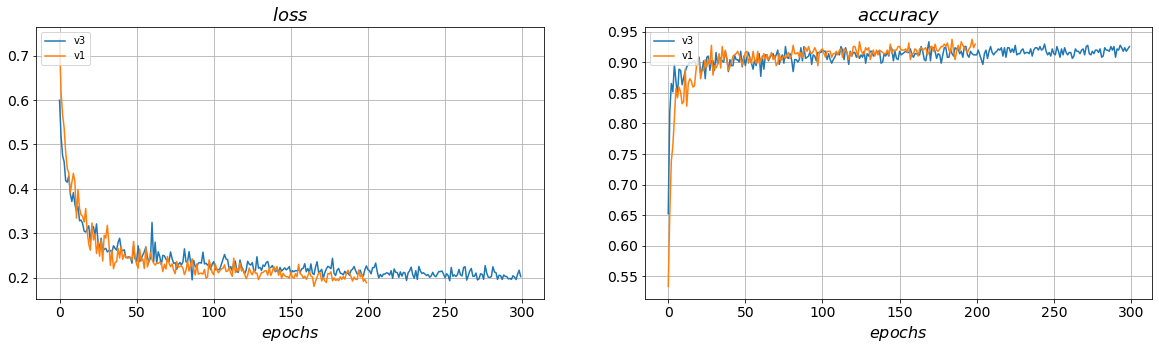

In [0]:
# 20143038 김선필

# Plot result

# matplotlib를 사용하기 위해서는 먼저 matplotlib.pyplot을 아래와 같이 import한다. 
# pyplot을 다른 이름으로 사용할 수 있지만 통산 plt라는 alias를 사용한다.
import matplotlib.pyplot as plt
x_axis = np.arange(0,200,1)
# (20x5) 사이즈의 새로운 figure를 생성한다.
plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

# 전체 figure을 가로 2칸, 세로 1칸으로 쪼개고 그 중 첫번째 칸에 plot 한다.
plt.subplot(1,2,1)
# 제목의 이름은 'loss' 으로 지정한다.
plt.title("$loss$",fontsize = 18)
# losses_v3 list에 들어있는값을 plot한다.
plt.plot(losses_v3)
plt.plot(losses)
plt.grid()
plt.legend(['v3', 'v1'], loc='upper left')
# plt.xlabel() 은 x 축의 이름을 epoch라는 이름으로 정해준다
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# 전체 figure을 가로 2칸, 세로 1칸으로 쪼개고 그 중 두번째 칸에 plot 한다.
plt.subplot(1,2,2)
# 제목의 이름은 'accuracy' 으로 지정한다.
plt.title("$accuracy$", fontsize = 18)
# accuracies list에 들어있는값을 plot한다.
plt.plot(accuracies_v3)
plt.plot(accuracies)
plt.legend(['v3', 'v1'], loc='upper left')
plt.grid()
# plt.xlabel() 은 x 축의 이름을 epoch라는 이름으로 정해준다
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [0]:
# Test Section
# 20143038 김선필
# test 데이터를 학습된 모델에 적용한다.
output = model(x_test)
# output의 값이 0.5 보다 클 때 라벨값 1로 지정
output[output>=0.5] = 1
# output의 값이 0.5 보다 작을 때 라벨값 0로 지정
output[output<0.5] = 0

# output 결과와 ground truth 결과에 대한 test accuracy 계산
accuracy = sum(sum(y_test.data.numpy() == output.data.T.numpy())) /len(y_test)

print("Ver1_Accuracy : ", acc_ver1)
print("Ver3_Accuracy :", round(accuracy,4))

Ver1_Accuracy :  0.8947
Ver3_Accuracy : 0.9298


## 국민대학교 소프트웨어 학부
## 20143038 김선필
### 차량지능기초 과제 2
### VER 4. Torch - Optimizer 를 SGD -> Adam 변경
##### Adam의 장점은 stepsize가 gradient의 rescaling에 영향 받지 않는다는 것이다. gradient가 커져도 stepsize는 bound되어 있어서 어떠한 objective function을 사용한다 하더라도 안정적으로 최적화를 위한 하강이 가능하다. 게다가 stepsize를 과거의 gradient 크기를 참고하여 adapted시킬 수 있다.


In [0]:
# Data loading
# 20143038 김선필
'''
sklearn.datasets 패키지는 mnist, iris 데이터같은 대표적인 sample dataset을 제공하고 손쉽게 다운로드 및 로딩할 수 있는 패키지이다.
sample로 제공해주는 dataset이기에 그 샘플 데이터의 크기가 머신러닝을 학습하기에 충분하지 않을수 있다.
sample dataset은 sklearn을 활용함에 있어서 샘플로써 활용하기에 용이하도록 제공하고 있으며, 
실제 데이터셋은 보통사이즈가 제공해주는 것보다 훨씬 크다.

sklearn의 공식 document에서도 이렇게 제공해주는 sample datasets을 Toy datasets라고 칭한다.
'''
from sklearn.datasets import load_breast_cancer
# Dataframe을 다루기 위해 만들어진 Pandas 라이브러리를 import한다.
import pandas as pd

# Breast Cancer Wisconsin Dataset 을 cancer 변수에 할당한다.
cancer = load_breast_cancer()
# Breast Cancer Wisconsin Dataset 의 data 부분을 data 변수에 할당한다.
# data shape : ( 569, 30 )         data type : numpy.ndarray
data = cancer.data
#print(data.shape)
#print(type(data))
# Breast Cancer Wisconsin Dataset 의 label 부분(양성, 악성)을 label 변수에 할당한다.
# label shape : ( 569, 30 )        label type : numpy.ndarray
labels = cancer.target

# Pandas Dataframe을 생성한다.
# 각 Data마다의 feature name 을 columns 값으로 넘겨주고, data를 넘겨준다.
df = pd.DataFrame(data, columns=cancer.feature_names)
# Series 객체
# 1차원 배열과 같은 자료구조로 index가 같이 출력되는 특징이 있다.
# DataFrame의 한 개의 column에 해당하는 데이터의 모음 object 즉, column vector를 표현한다.
sy = pd.Series(labels, dtype="category")
# 카테고리의 이름을 재설정한다. labels 의 값을 target_names 에 할당된 값 maliganant, benign 으로 재설정한다.
sy = sy.cat.rename_categories(cancer.target_names)
# class 라는 이름의 column vector를 추가한다.
df['class'] = sy
# DataFrame의 앞 5개의 data를 시각화한다.
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [0]:
# Split data
# 20143038 김선필
from sklearn.model_selection import train_test_split

# 데이터와 레이블 정보를 넣어 training set과 test set을 분할한다. 
# train set과 test set의 비율은 9 : 1로 설정한다.
# x_train 의 경우 train set의 Data 정보이며,
# y_train 의 경우 train set의 Label 정보로 구성되어 있다.
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1) 
print(len(x_train), len(x_test), type(x_train))

print(x_test)
print(y_test)

512 57 <class 'numpy.ndarray'>
[[1.955e+01 2.877e+01 1.336e+02 ... 1.941e-01 2.818e-01 1.005e-01]
 [1.714e+01 1.640e+01 1.160e+02 ... 2.550e-01 4.066e-01 1.059e-01]
 [1.303e+01 1.842e+01 8.261e+01 ... 5.013e-02 1.987e-01 6.169e-02]
 ...
 [1.176e+01 1.814e+01 7.500e+01 ... 7.160e-02 1.978e-01 6.915e-02]
 [8.671e+00 1.445e+01 5.442e+01 ... 0.000e+00 2.592e-01 7.848e-02]
 [9.847e+00 1.568e+01 6.300e+01 ... 6.528e-02 2.502e-01 9.209e-02]]
[0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1]


In [0]:
# Convert to tensor
# 20143038 김선필
# 텐서를 생성하는 라이브러리
import torch
# 신경망을 생성하는 라이브러리
import torch.nn as nn
import torch.nn.functional as F
# 데이터 조작 등 유틸리티 기능 제공
from torch.utils.data import DataLoader, TensorDataset
# 자동 미분 기능을 제공하는 라이브러리
from torch.autograd import Variable

import numpy as np

# x_train 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
x_train = Variable(torch.from_numpy(x_train).float())
# y_train 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
y_train = Variable(torch.from_numpy(y_train).float())

# x_test 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
x_test = Variable(torch.from_numpy(x_test).float())
# y_test 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
y_test = Variable(torch.from_numpy(y_test).float())

print(type(x_train))

<class 'torch.Tensor'>


In [0]:
# Generating dataset
# 20143038 김선필
# training set 의 학습 데이터와 레이블을 TensorDataset 컨테이너에 할당한다.
train_set = TensorDataset(x_train, y_train)
# test set 의 학습 데이터와 레이블을 TensorDataset 컨테이너에 할당한다.
test_set = TensorDataset(x_test, y_test)

# 데이터 순서를 섞어서 8개씩 데이터를 반환하는 DataLoader
train_loader = DataLoader(train_set, batch_size = 16, shuffle=True)

In [0]:
# 20143038 김선필

# Construct model
# 모델 생성
# Pytorch Model 사용 조건
# 1. torch.nn.Module을 상속해야한다.
# 2. __init__()과 forward() 를 override 해야한다.
# ---- 사용자 정의 모델의 경우 init 과 forward의 인자는 자유롭게 바꿀 수 있다.
# ---- 이름이 x일 필요도 없으며, 인자의 개수 또한 달라질 수 있다.

class Model(nn.Module):
  # __init__() 에서는 모델에서 사용될 module을 정의한다. module만 정의할 수도, 
  # activation function 등을 전부 정의할 수도 있다.
  # module은 nn,Linear, nn.Conv2d 등을 포함한다.
  # activation function은 nn.funtional.relu, nn.function.sigmoid 등을 포함한다.
  def __init__(self):
    super().__init__()
    
    # torch.nn.Linear 는 레이어 간의 선형결합을 의미하고, 이를 활성함수에 통과시키면, MLP 구조가 된다.
    # torch.nn.Linear(in_features, out_features,bias=True)
    # in_features : size of each input sample
    # out_features : size of each output sample
    # bias : If set to False, the layer will not learn an additive bias

    self.layer1 = nn.Linear(30, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 32)
    self.layer4 = nn.Linear(32, 16)
    self.layer5 = nn.Linear(16, 1)

    # torch.nn.ReLU(inplace=False) : element 별로 rectified linear unit function을 적용한다.
    self.act = nn.ReLU()
   
  # forward() 에서는 모델에서 행해져야 하는 계산을 정의한다. 모델에서 forward 계산과
  # backward gradient 계산이 있는데, 그 중 forward 부분을 정의한다. 
  # input을 네트워크에 통과시켜 어떤 output이 나오는지 정의한다고 보면된다.
  # __init__() 에서 정의한 module들을 그대로 갖다 쓴다.
  # backward 계산은 Pytorch에서 알아서 계산이 된다. 
  def forward(self,x):
    # ReLU(Linear(30,128))
    x = self.act(self.layer1(x))
    # ReLU(Linear(128,64))
    x = self.act(self.layer2(x))
    # ReLU(Linear(64,32))
    x = self.act(self.layer3(x))
    # ReLU(Linear(32,16))
    x = self.act(self.layer4(x))
    # ReLU(Linear(16,1))
    x = self.layer5(x)
    # torch.nn.Sigmoid : element 별로 sigmoid function을 적용한다.
    x = torch.sigmoid(x)
    
    return x

# model 초기화
model = Model()
print(model)


Model(
  (layer1): Linear(in_features=30, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=16, bias=True)
  (layer5): Linear(in_features=16, out_features=1, bias=True)
  (act): ReLU()
)


In [0]:
# Configure optimizer
# 20143038 김선필
# 옵티마이저 초기화

# torch.optim.Adam(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False)
# stochastic gradient descent를 적용한다.
# params : iterable of parameters to optimizer or dicts defining parameter groups
# lr : learning rate
# momentum : momentum factor
# weight_decay : weight decay
# dampening : dampening for momentum
# nesterov : enables Nesterov momentum
#optimizer = torch.optim.SGD(model.parameters(), lr=0.0007)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [0]:
# Training

# 20143038 김선필

# 수행할 epoch 정의
epochs = 200
# loss 정보를 저장할 list 초기화
losses_v4 = list()
# 정확도 정보를 저장할 list 초기화
accuracies_v4 = list()


for epoch in range(epochs):
  # epoch 별 loss 초기화
  epoch_loss = 0  
  # epoch 별 accuracy 초기화
  epoch_accuracy = 0

  for x, y in train_loader:
    # 역전파 단계 전에, Optimizer 객체를 사용하여, 갱신할 변수들에 대한
    # 모든 변화도를 0으로 만든다. 이렇게 하는 이유는 기본적으로 backward()
    # 를 호출할 때마다 변화도가 버퍼에 누적되기 때문이다.
    optimizer.zero_grad()
    
    # 순전파 단계 : 모델에 x 를 전달하여 foward() function을 통과한 output을 반환받는다.
    output = model(x)
      
    # torch.nn.functional.binary_cross_entropy(input, target, weight=None, size_average=None, reduce=None, reduction='mean')
    # target 과 output 사이의 Binary Cross Entropy 값을 구한다.
    # input : Tensor of arbitrary shape
    # target : Tensor of the same shape as input
    loss = F.binary_cross_entropy(output, y)

    # autograd를 사용하여 역전파 단계를 계산한다. 이는 required_grad=True를 갖는
    # 모든 Tensor에 대해 손실의 변화도를 계산한다.
    loss.backward()
    
    # optimizer.step() function을 호출하면 매개변수가 갱신이 된다.
    optimizer.step()
    
    # 이진 분류이기 때문에
    # output의 값이 0.5 보다 클 때 라벨값 1로 지정
    output[output>=0.5] = 1
    # output의 값이 0.5보다 작을 때 라벨값 0로 지정
    output[output<0.5] = 0
    # output 결과와 ground truth 결과에 대한 accuracy 계산
    accuracy = sum(sum(y.data.numpy() == output.data.T.numpy()))
    
    # 한 epoch에서 loss의 누적합을 계산
    epoch_loss += loss.item()
    # 한 epoch에서 accuracy의 누적합을 계산
    epoch_accuracy += accuracy
  
  # loss의 누적 합을 데이터셋의 개수로 나눔으로써 평균낸다.
  epoch_loss /= len(train_loader)
  # accuracy의 누적 합을 데이터셋의 개수로 나눔으로써 평균낸다.
  epoch_accuracy /= len(x_train)
  # 평균 loss, accuracy 출력
  print(str(epoch+1).zfill(3), "loss :", round(epoch_loss,4),"accuracy :", round(epoch_accuracy,4))
  
  # epoch 별 평균 loss 를 저장할 list
  losses_v4.append(epoch_loss)
  # epoch 별 평균 accuracy 를 저장할 list
  accuracies_v4.append(epoch_accuracy)

  

001 loss : 0.5088 accuracy : 0.7793
002 loss : 0.3469 accuracy : 0.8887


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])) is deprecated. Please ensure they have the same size.


003 loss : 0.4177 accuracy : 0.834
004 loss : 0.2856 accuracy : 0.9102
005 loss : 0.2735 accuracy : 0.8965
006 loss : 0.2501 accuracy : 0.9062
007 loss : 0.2664 accuracy : 0.8984
008 loss : 0.2303 accuracy : 0.916
009 loss : 0.2676 accuracy : 0.9043
010 loss : 0.2308 accuracy : 0.9219
011 loss : 0.3021 accuracy : 0.8789
012 loss : 0.2431 accuracy : 0.9199
013 loss : 0.2271 accuracy : 0.9121
014 loss : 0.2312 accuracy : 0.9121
015 loss : 0.2259 accuracy : 0.916
016 loss : 0.2247 accuracy : 0.9141
017 loss : 0.2206 accuracy : 0.9238
018 loss : 0.2087 accuracy : 0.9277
019 loss : 0.2104 accuracy : 0.9258
020 loss : 0.2331 accuracy : 0.9199
021 loss : 0.2237 accuracy : 0.918
022 loss : 0.217 accuracy : 0.9141
023 loss : 0.2262 accuracy : 0.918
024 loss : 0.1807 accuracy : 0.9258
025 loss : 0.2149 accuracy : 0.9141
026 loss : 0.1937 accuracy : 0.9336
027 loss : 0.1868 accuracy : 0.9238
028 loss : 0.171 accuracy : 0.9375
029 loss : 0.1883 accuracy : 0.9141
030 loss : 0.2384 accuracy : 0.9082

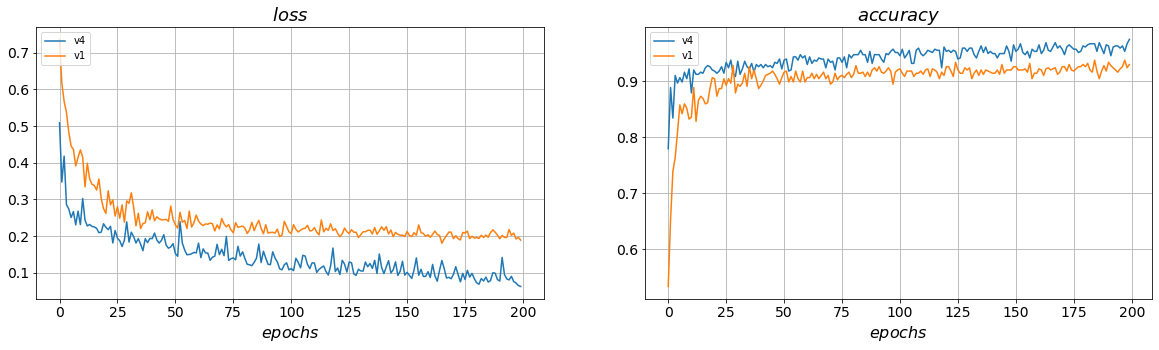

In [0]:
# 20143038 김선필

# Plot result

# matplotlib를 사용하기 위해서는 먼저 matplotlib.pyplot을 아래와 같이 import한다. 
# pyplot을 다른 이름으로 사용할 수 있지만 통산 plt라는 alias를 사용한다.
import matplotlib.pyplot as plt
x_axis = np.arange(0,200,1)
# (20x5) 사이즈의 새로운 figure를 생성한다.
plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

# 전체 figure을 가로 2칸, 세로 1칸으로 쪼개고 그 중 첫번째 칸에 plot 한다.
plt.subplot(1,2,1)
# 제목의 이름은 'loss' 으로 지정한다.
plt.title("$loss$",fontsize = 18)
# losses_v3 list에 들어있는값을 plot한다.
plt.plot(losses_v4)
plt.plot(losses)
plt.legend(['v4', 'v1'], loc='upper left')
plt.grid()
# plt.xlabel() 은 x 축의 이름을 epoch라는 이름으로 정해준다
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# 전체 figure을 가로 2칸, 세로 1칸으로 쪼개고 그 중 두번째 칸에 plot 한다.
plt.subplot(1,2,2)
# 제목의 이름은 'accuracy' 으로 지정한다.
plt.title("$accuracy$", fontsize = 18)
# accuracies list에 들어있는값을 plot한다.
plt.plot(accuracies_v4)
plt.plot(accuracies)
plt.legend(['v4', 'v1'], loc='upper left')
plt.grid()
# plt.xlabel() 은 x 축의 이름을 epoch라는 이름으로 정해준다
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [0]:
# Test Section

# test 데이터를 학습된 모델에 적용한다.
output = model(x_test)
# output의 값이 0.5 보다 클 때 라벨값 1로 지정
output[output>=0.5] = 1
# output의 값이 0.5 보다 작을 때 라벨값 0로 지정
output[output<0.5] = 0

# output 결과와 ground truth 결과에 대한 test accuracy 계산
accuracy = sum(sum(y_test.data.numpy() == output.data.T.numpy())) /len(y_test)

print("Ver1_Accuracy : ", acc_ver1)
print("Ver3_Accuracy :", round(accuracy,4))

Ver1_Accuracy :  0.8947
Ver3_Accuracy : 0.9298


## 국민대학교 소프트웨어 학부
## 20143038 김선필
### 차량지능기초 과제 2
### VER 5. Torch - Adam + learning rate & epoch 변경
##### Adam의 장점은 stepsize가 gradient의 rescaling에 영향 받지 않는다는 것이다. gradient가 커져도 stepsize는 bound되어 있어서 어떠한 objective function을 사용한다 하더라도 안정적으로 최적화를 위한 하강이 가능하다. 게다가 stepsize를 과거의 gradient 크기를 참고하여 adapted시킬 수 있다.

##### ver4 의 결과에서 생각보다 수렴값에 도달하지 않은 것 같아서 ver3에서 수행한 epoch과 lr을 조정하였다.

In [0]:
# Data loading
# 20143038 김선필
'''
sklearn.datasets 패키지는 mnist, iris 데이터같은 대표적인 sample dataset을 제공하고 손쉽게 다운로드 및 로딩할 수 있는 패키지이다.
sample로 제공해주는 dataset이기에 그 샘플 데이터의 크기가 머신러닝을 학습하기에 충분하지 않을수 있다.
sample dataset은 sklearn을 활용함에 있어서 샘플로써 활용하기에 용이하도록 제공하고 있으며, 
실제 데이터셋은 보통사이즈가 제공해주는 것보다 훨씬 크다.

sklearn의 공식 document에서도 이렇게 제공해주는 sample datasets을 Toy datasets라고 칭한다.
'''
from sklearn.datasets import load_breast_cancer
# Dataframe을 다루기 위해 만들어진 Pandas 라이브러리를 import한다.
import pandas as pd

# Breast Cancer Wisconsin Dataset 을 cancer 변수에 할당한다.
cancer = load_breast_cancer()
# Breast Cancer Wisconsin Dataset 의 data 부분을 data 변수에 할당한다.
# data shape : ( 569, 30 )         data type : numpy.ndarray
data = cancer.data
#print(data.shape)
#print(type(data))
# Breast Cancer Wisconsin Dataset 의 label 부분(양성, 악성)을 label 변수에 할당한다.
# label shape : ( 569, 30 )        label type : numpy.ndarray
labels = cancer.target

# Pandas Dataframe을 생성한다.
# 각 Data마다의 feature name 을 columns 값으로 넘겨주고, data를 넘겨준다.
df = pd.DataFrame(data, columns=cancer.feature_names)
# Series 객체
# 1차원 배열과 같은 자료구조로 index가 같이 출력되는 특징이 있다.
# DataFrame의 한 개의 column에 해당하는 데이터의 모음 object 즉, column vector를 표현한다.
sy = pd.Series(labels, dtype="category")
# 카테고리의 이름을 재설정한다. labels 의 값을 target_names 에 할당된 값 maliganant, benign 으로 재설정한다.
sy = sy.cat.rename_categories(cancer.target_names)
# class 라는 이름의 column vector를 추가한다.
df['class'] = sy
# DataFrame의 앞 5개의 data를 시각화한다.
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [0]:
# Split data

from sklearn.model_selection import train_test_split

# 데이터와 레이블 정보를 넣어 training set과 test set을 분할한다. 
# train set과 test set의 비율은 9 : 1로 설정한다.
# x_train 의 경우 train set의 Data 정보이며,
# y_train 의 경우 train set의 Label 정보로 구성되어 있다.
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1) 
print(len(x_train), len(x_test), type(x_train))

print(x_test)
print(y_test)

512 57 <class 'numpy.ndarray'>
[[1.448e+01 2.146e+01 9.425e+01 ... 1.225e-01 3.020e-01 6.846e-02]
 [1.299e+01 1.423e+01 8.408e+01 ... 5.850e-02 2.432e-01 1.009e-01]
 [1.474e+01 2.542e+01 9.470e+01 ... 1.095e-01 2.722e-01 6.956e-02]
 ...
 [8.597e+00 1.860e+01 5.409e+01 ... 0.000e+00 3.142e-01 8.116e-02]
 [1.086e+01 2.148e+01 6.851e+01 ... 0.000e+00 2.458e-01 6.592e-02]
 [1.141e+01 1.492e+01 7.353e+01 ... 6.296e-02 1.811e-01 7.427e-02]]
[0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1]


In [0]:
# Convert to tensor

# 텐서를 생성하는 라이브러리
import torch
# 신경망을 생성하는 라이브러리
import torch.nn as nn
import torch.nn.functional as F
# 데이터 조작 등 유틸리티 기능 제공
from torch.utils.data import DataLoader, TensorDataset
# 자동 미분 기능을 제공하는 라이브러리
from torch.autograd import Variable

import numpy as np

# x_train 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
x_train = Variable(torch.from_numpy(x_train).float())
# y_train 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
y_train = Variable(torch.from_numpy(y_train).float())

# x_test 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
x_test = Variable(torch.from_numpy(x_test).float())
# y_test 의 ndarray 객체를 float Tensor 자료형으로 변환하고 Variable 클래스로 wrapping 한다. 
y_test = Variable(torch.from_numpy(y_test).float())

print(type(x_train))

<class 'torch.Tensor'>


In [0]:
# Generating dataset

# training set 의 학습 데이터와 레이블을 TensorDataset 컨테이너에 할당한다.
train_set = TensorDataset(x_train, y_train)
# test set 의 학습 데이터와 레이블을 TensorDataset 컨테이너에 할당한다.
test_set = TensorDataset(x_test, y_test)

# 데이터 순서를 섞어서 8개씩 데이터를 반환하는 DataLoader
train_loader = DataLoader(train_set, batch_size = 16, shuffle=True)

In [0]:
# 20143038 김선필

# Construct model
# 모델 생성
# Pytorch Model 사용 조건
# 1. torch.nn.Module을 상속해야한다.
# 2. __init__()과 forward() 를 override 해야한다.
# ---- 사용자 정의 모델의 경우 init 과 forward의 인자는 자유롭게 바꿀 수 있다.
# ---- 이름이 x일 필요도 없으며, 인자의 개수 또한 달라질 수 있다.

class Model(nn.Module):
  # __init__() 에서는 모델에서 사용될 module을 정의한다. module만 정의할 수도, 
  # activation function 등을 전부 정의할 수도 있다.
  # module은 nn,Linear, nn.Conv2d 등을 포함한다.
  # activation function은 nn.funtional.relu, nn.function.sigmoid 등을 포함한다.
  def __init__(self):
    super().__init__()
    
    # torch.nn.Linear 는 레이어 간의 선형결합을 의미하고, 이를 활성함수에 통과시키면, MLP 구조가 된다.
    # torch.nn.Linear(in_features, out_features,bias=True)
    # in_features : size of each input sample
    # out_features : size of each output sample
    # bias : If set to False, the layer will not learn an additive bias

    self.layer1 = nn.Linear(30, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 32)
    self.layer4 = nn.Linear(32, 16)
    self.layer5 = nn.Linear(16, 1)

    # torch.nn.ReLU(inplace=False) : element 별로 rectified linear unit function을 적용한다.
    self.act = nn.ReLU()
   
  # forward() 에서는 모델에서 행해져야 하는 계산을 정의한다. 모델에서 forward 계산과
  # backward gradient 계산이 있는데, 그 중 forward 부분을 정의한다. 
  # input을 네트워크에 통과시켜 어떤 output이 나오는지 정의한다고 보면된다.
  # __init__() 에서 정의한 module들을 그대로 갖다 쓴다.
  # backward 계산은 Pytorch에서 알아서 계산이 된다. 
  def forward(self,x):
    # ReLU(Linear(30,128))
    x = self.act(self.layer1(x))
    # ReLU(Linear(128,64))
    x = self.act(self.layer2(x))
    # ReLU(Linear(64,32))
    x = self.act(self.layer3(x))
    # ReLU(Linear(32,16))
    x = self.act(self.layer4(x))
    # ReLU(Linear(16,1))
    x = self.layer5(x)
    # torch.nn.Sigmoid : element 별로 sigmoid function을 적용한다.
    x = torch.sigmoid(x)
    
    return x

# model 초기화
model = Model()
print(model)


Model(
  (layer1): Linear(in_features=30, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=16, bias=True)
  (layer5): Linear(in_features=16, out_features=1, bias=True)
  (act): ReLU()
)


In [0]:
# Configure optimizer
# 20143038 김선필
# 옵티마이저 초기화
# torch.optim.SGD(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False)
# stochastic gradient descent를 적용한다.
# params : iterable of parameters to optimizer or dicts defining parameter groups
# lr : learning rate
# momentum : momentum factor
# weight_decay : weight decay
# dampening : dampening for momentum
# nesterov : enables Nesterov momentum
#optimizer = torch.optim.SGD(model.parameters(), lr=0.0007)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.0004)

In [0]:
# Training

# 20143038 김선필

# 수행할 epoch 정의
epochs = 300
# loss 정보를 저장할 list 초기화
losses_v5 = list()
# 정확도 정보를 저장할 list 초기화
accuracies_v5 = list()


for epoch in range(epochs):
  # epoch 별 loss 초기화
  epoch_loss = 0  
  # epoch 별 accuracy 초기화
  epoch_accuracy = 0

  for x, y in train_loader:
    # 역전파 단계 전에, Optimizer 객체를 사용하여, 갱신할 변수들에 대한
    # 모든 변화도를 0으로 만든다. 이렇게 하는 이유는 기본적으로 backward()
    # 를 호출할 때마다 변화도가 버퍼에 누적되기 때문이다.
    optimizer.zero_grad()
    
    # 순전파 단계 : 모델에 x 를 전달하여 foward() function을 통과한 output을 반환받는다.
    output = model(x)
      
    # torch.nn.functional.binary_cross_entropy(input, target, weight=None, size_average=None, reduce=None, reduction='mean')
    # target 과 output 사이의 Binary Cross Entropy 값을 구한다.
    # input : Tensor of arbitrary shape
    # target : Tensor of the same shape as input
    loss = F.binary_cross_entropy(output, y)

    # autograd를 사용하여 역전파 단계를 계산한다. 이는 required_grad=True를 갖는
    # 모든 Tensor에 대해 손실의 변화도를 계산한다.
    loss.backward()
    
    # optimizer.step() function을 호출하면 매개변수가 갱신이 된다.
    optimizer.step()
    
    # 이진 분류이기 때문에
    # output의 값이 0.5 보다 클 때 라벨값 1로 지정
    output[output>=0.5] = 1
    # output의 값이 0.5보다 작을 때 라벨값 0로 지정
    output[output<0.5] = 0
    # output 결과와 ground truth 결과에 대한 accuracy 계산
    accuracy = sum(sum(y.data.numpy() == output.data.T.numpy()))
    
    # 한 epoch에서 loss의 누적합을 계산
    epoch_loss += loss.item()
    # 한 epoch에서 accuracy의 누적합을 계산
    epoch_accuracy += accuracy
  
  # loss의 누적 합을 데이터셋의 개수로 나눔으로써 평균낸다.
  epoch_loss /= len(train_loader)
  # accuracy의 누적 합을 데이터셋의 개수로 나눔으로써 평균낸다.
  epoch_accuracy /= len(x_train)
  # 평균 loss, accuracy 출력
  print(str(epoch+1).zfill(3), "loss :", round(epoch_loss,4),"accuracy :", round(epoch_accuracy,4))
  
  # epoch 별 평균 loss 를 저장할 list
  losses_v5.append(epoch_loss)
  # epoch 별 평균 accuracy 를 저장할 list
  accuracies_v5.append(epoch_accuracy)

  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])) is deprecated. Please ensure they have the same size.


001 loss : 0.5643 accuracy : 0.7461
002 loss : 0.4046 accuracy : 0.873
003 loss : 0.3389 accuracy : 0.8848
004 loss : 0.2957 accuracy : 0.8926
005 loss : 0.3115 accuracy : 0.8809
006 loss : 0.3158 accuracy : 0.8867
007 loss : 0.2562 accuracy : 0.9082
008 loss : 0.2558 accuracy : 0.9102
009 loss : 0.2619 accuracy : 0.9043
010 loss : 0.2661 accuracy : 0.9004
011 loss : 0.318 accuracy : 0.875
012 loss : 0.2419 accuracy : 0.9102
013 loss : 0.2318 accuracy : 0.9199
014 loss : 0.2651 accuracy : 0.8965
015 loss : 0.2599 accuracy : 0.9062
016 loss : 0.2268 accuracy : 0.916
017 loss : 0.2413 accuracy : 0.916
018 loss : 0.2451 accuracy : 0.9004
019 loss : 0.2335 accuracy : 0.9062
020 loss : 0.2106 accuracy : 0.916
021 loss : 0.214 accuracy : 0.9199
022 loss : 0.2133 accuracy : 0.9121
023 loss : 0.2279 accuracy : 0.916
024 loss : 0.2121 accuracy : 0.916
025 loss : 0.2169 accuracy : 0.9199
026 loss : 0.2212 accuracy : 0.9062
027 loss : 0.2077 accuracy : 0.9219
028 loss : 0.2227 accuracy : 0.9199
0

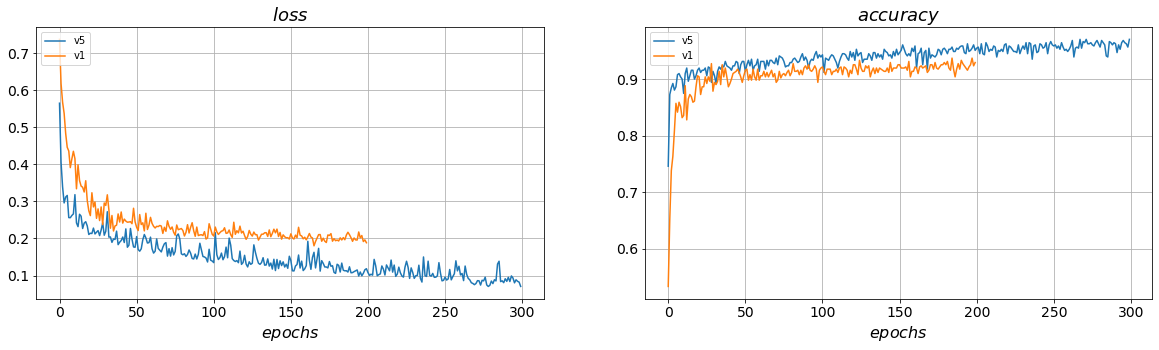

In [0]:
# 20143038 김선필

# Plot result

# matplotlib를 사용하기 위해서는 먼저 matplotlib.pyplot을 아래와 같이 import한다. 
# pyplot을 다른 이름으로 사용할 수 있지만 통산 plt라는 alias를 사용한다.
import matplotlib.pyplot as plt
x_axis = np.arange(0,200,1)
# (20x5) 사이즈의 새로운 figure를 생성한다.
plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

# 전체 figure을 가로 2칸, 세로 1칸으로 쪼개고 그 중 첫번째 칸에 plot 한다.
plt.subplot(1,2,1)
# 제목의 이름은 'loss' 으로 지정한다.
plt.title("$loss$",fontsize = 18)
# losses_v3 list에 들어있는값을 plot한다.
plt.plot(losses_v5)
plt.plot(losses)
plt.legend(['v5', 'v1'], loc='upper left')
plt.grid()
# plt.xlabel() 은 x 축의 이름을 epoch라는 이름으로 정해준다
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# 전체 figure을 가로 2칸, 세로 1칸으로 쪼개고 그 중 두번째 칸에 plot 한다.
plt.subplot(1,2,2)
# 제목의 이름은 'accuracy' 으로 지정한다.
plt.title("$accuracy$", fontsize = 18)
# accuracies list에 들어있는값을 plot한다.
plt.plot(accuracies_v5)
plt.plot(accuracies)
plt.legend(['v5', 'v1'], loc='upper left')
plt.grid()
# plt.xlabel() 은 x 축의 이름을 epoch라는 이름으로 정해준다
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [0]:
# Test Section

# test 데이터를 학습된 모델에 적용한다.
output = model(x_test)
# output의 값이 0.5 보다 클 때 라벨값 1로 지정
output[output>=0.5] = 1
# output의 값이 0.5 보다 작을 때 라벨값 0로 지정
output[output<0.5] = 0

# output 결과와 ground truth 결과에 대한 test accuracy 계산
accuracy = sum(sum(y_test.data.numpy() == output.data.T.numpy())) /len(y_test)

print("Ver1_Accuracy : ", acc_ver1)
print("Ver5_Accuracy :", round(accuracy,4))

Ver1_Accuracy :  0.8947
Ver5_Accuracy : 0.9825
